### Work directory
Before running a window, set the work directory (output_folder)

#### Two component uniform with FSSE on monomer B

..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........


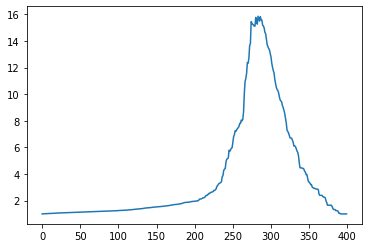

In [3]:
import numpy as np
from modules.graph_simulation import KineticRates, System, GraphSimulation

loads = [200, 100]
functionalities = [2, 4]

kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")

output_folder = "./example_1" + "/"

target_conversion = 1. # max. extent of reaction
for i in range(10):
    system = System(loads, kinetic_rates)
    fsse1 = [1., 1., 0.]
    fsse2 = [100., 10., 1., .1, 0.] 
    sim = GraphSimulation(system, [fsse1, fsse2], cycles_allowed=True)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)
    
from modules.post_process import PostProcess
import matplotlib.pyplot as plt

pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes()

plt.plot(pp.topology_data["dispersion_index"])
plt.xlabel("reaction count")
plt.title("poly-dispersity index")
plt.ylabel("pdi")

#### One component with two types of f. groups that can only react with each other

..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........


Text(0, 0.5, 'pdi')

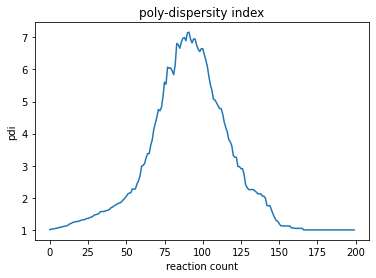

In [4]:
import numpy as np
from modules.graph_simulation import KineticRates, System, GraphSimulation

loads = [100]
functionalities = [4]

kinetic_rate_table = [[0, 0, 1, 1],
                      [0, 0, 1, 1],
                      [1, 1, 0, 0],
                      [1, 1, 0, 0]]
monomer1_index, monomer2_index = 0, 0 # monomer A index = 0, monomer B index = 1, etc.
kinetic_rates = KineticRates(functionalities)
kinetic_rates.add_kinetic_rate_table(monomer1_index, monomer2_index, kinetic_rate_table)

output_folder = "./example_2" + "/"

target_conversion = 1. # max. extent of reaction
for i in range(10):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, "ideal", cycles_allowed=True)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)
    
from modules.post_process import PostProcess
import matplotlib.pyplot as plt

pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes()

plt.plot(pp.topology_data["dispersion_index"])
plt.xlabel("reaction count")
plt.title("poly-dispersity index")
plt.ylabel("pdi")

#### Two component uniform with conversion dependent FSSE loaded from a file

D:\CAM\PhD_Year3\FSSE\examples
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........


Text(0, 0.5, 'pdi')

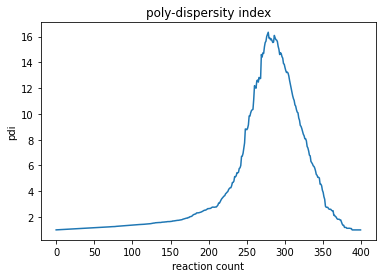

In [10]:

import numpy as np
from modules.graph_simulation import KineticRates, System, GraphSimulation
import os
loads = [200, 100]
functionalities = [2, 4]

kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")

output_folder = "./example_3" + "/"

target_conversion = 1. # max. extent of reaction
for i in range(10):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'data', cycles_allowed=True)
    fsse_path = "./p4a_fsse.data"
    conv_path = "./p4a_conv.data"
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    sim.set_fsse_file_paths(fsse_monomer_index, fsse_path, conv_path)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)
    
from modules.post_process import PostProcess
import matplotlib.pyplot as plt

pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes()

plt.plot(pp.topology_data["dispersion_index"])
plt.xlabel("reaction count")
plt.title("poly-dispersity index")
plt.ylabel("pdi")
